<a href="https://colab.research.google.com/github/JaimeRedondo/Mushrooms_Classification/blob/master/Mushrooms_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries Import

In [1]:
#working with images
! pip install opencv-python
from matplotlib import image
from matplotlib import pyplot
from skimage import io
import cv2
import os
import skimage
from skimage import data, io, filters, transform

#--Web scraping packages
from bs4 import BeautifulSoup
import requests
import itertools
from urllib.request import Request, urlopen
import urllib.request

#Pandas/numpy for data manipulation
import pandas as pd
import numpy as np
from urllib.request import urlopen

#barrita de progreso
from tqdm.notebook import tqdm
from time import sleep 

#Visualize data
%pylab inline
plt.style.use('seaborn-talk')

#import deep learning libraries
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Input
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

! pip install streamlit
! pip install pyngrok
from pyngrok import ngrok
import streamlit as st




Populating the interactive namespace from numpy and matplotlib


In [2]:
### first of all put the script Scraping_Mushrooms.ipynb in this script 

## Choosing data

In [3]:
print("Do you want to scrape your own mushrooms or use the data existing?, put Scrape_mushrooms or Use_data")

def scrape_mushrooms(option=input()):
  
  if option == 'Scrape_mushrooms':
    from google.colab import files
    uploaded = files.upload()
    %run Scraping_Mushrooms.ipynb
    return None

  elif option == 'Use_data':
    print('Get the data existing and put it in this directory, later read it')
    print('if you prefer to put in other route you only need to change the main route to after read the data')
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_output_1 = '/content/gdrive/MyDrive/Mushrooms_Classification_Guadalajara'
    ## change to the path you save your data
    return path_output_1

  else:
    print('The option must be Scrape_mushrooms or Use_data, please, try again:')
    return scrape_mushrooms(option=input())

main_route = scrape_mushrooms()

if main_route == None:
  main_route = path_output
else:
  main_route = scrape_mushrooms()

Do you want to scrape your own mushrooms or use the data existing?, put Scrape_mushrooms or Use_data
Scrape_mushrooms


Saving Scraping_Mushrooms.ipynb to Scraping_Mushrooms (3).ipynb
Populating the interactive namespace from numpy and matplotlib
Choose between All the regions or only Guadalajara Mushrooms
Guadalajara
You choose Guadalajara Mushrooms
Where do you want to save the photos?, example: /home/dsc/FP_Mushrooms/Mushrooms_Classification_Guadalajara
If you want your current path write 'Default'
Default
How many images per mushroom do you want? minimum 20, give a number multiple of 20 (20,40,60...)
20


Agaricus arvensis folder already created
Agaricus bitorquis folder already created
Agaricus campestris folder already created
Agaricus sylvaticus folder already created
Amanita caesarea folder already created
Amanita citrina folder already created
Amanita curtipes folder already created
Amanita muscaria folder already created
Amanita pantherina folder already created
Amanita phalloides folder already created
Boletus aereus folder already created
Boletus aestivalis folder already created
Boletus edulis folder already created
Boletus erythropus folder already created
Boletus luridus folder already created
Boletus pinophilus folder already created
Boletus satanas folder already created
Cantharellus cibarius folder already created
Clitocybe gibba folder already created
Clitocybe odora folder already created
Cratarellus cornucopioide folder already created
Cratarellus lutescens folder already created
Ganoderma lucidum folder already created
Lactarius controversus folder already created
Lact

## List with the mushrooms names (the folders names)

In [4]:
## defining the main route (depends on what did you choose before).

## witth the data you have already chosse

mushrooms_directory=[]
for folder in tqdm(os.listdir(main_route)):
    if '.' in folder:
        pass
    else:
        mushrooms_directory.append(folder)
        
mushrooms_directory=sorted(mushrooms_directory)

In [5]:
if 'sample_data' in mushrooms_directory:
  mushrooms_directory.remove("sample_data") 

if 'gdrive' in mushrooms_directory:
  mushrooms_directory.remove("gdrive") 

if 'ngrok' in mushrooms_directory:
  mushrooms_directory.remove("ngrok") 

## Pipeline with the process of each image for each mushroom

In [6]:
#resize all images shape in 28x28 and print what photos are not available
def resize_photos(directory,main_route,size_photo,number_of_photos):
    
    for folder in tqdm(directory):
        for numero in range(number_of_photos):
            try:
                route = main_route +'/'+ folder +'/'+ str(numero) + '.jpg'
                data_picture = io.imread(route)
                data_picture = cv2.resize(data_picture, size_photo)
                # save the images
                cv2.imwrite(route,data_picture)
            except:  
                print("Image number "+str(numero)+' of mushroom '+folder+' is not available')

#standarize 0_255 pixels to 0 - 1.
lista=[]
lista1=[]
def standarize_pixels_and_augmentation(directory,main_route,size_photo,number_of_photos):
    for folder in tqdm(directory):
        for numero in range(number_of_photos):
            try:
                route = main_route +'/'+folder +'/'+ str(numero) + '.jpg'
                image_rgb=io.imread(route)/255.0

                ##DATA AUGMENTATION##

                flip_1 = np.fliplr(image_rgb)
                #mirror with vertical line on right


                rot_90 = tf.image.rot90(image_rgb, k=1)
                rot_180 = tf.image.rot90(image_rgb, k=2)
                rot_270 = tf.image.rot90(image_rgb, k=3)
                #rotation of 90, 180 and 270 grades

                #now we are going to crop the imgs, can be whatever siza of crop we want
                height, width = image_rgb.shape[0:2]

                startRow = int(height*.15)

                startCol = int(width*.15)

                endRow = int(height*.85)

                endCol = int(width*.85)

                croppedImage = image_rgb[startRow:endRow, startCol:endCol]

                croppedImage = cv2.resize(croppedImage,size_photo)

                #now we are going to add contrast

                contrast_img = cv2.addWeighted(image_rgb, 1.5, np.zeros(image_rgb.shape, image_rgb.dtype), 0, 0)

                #desenfoque del 50% cogiendo la mediana de los pixeles
                blur_image = cv2.medianBlur(image_rgb,1)

                #add to list

                lista.append(image_rgb)
                lista.append(flip_1)
                lista.append(rot_90)
                lista.append(rot_180)
                lista.append(rot_270)
                lista.append(croppedImage)
                lista.append(contrast_img)
                lista.append(blur_image)
                lista1.append(folder)
                lista1.append(folder)
                lista1.append(folder)
                lista1.append(folder)
                lista1.append(folder)
                lista1.append(folder)
                lista1.append(folder)
                lista1.append(folder)            

            except:
              print("there are some problems with one of the mushrooms...")

def standarize_photos(directory,main_route,size_photo,number_of_photos):
    print("reshaping pictures...")
    resize_photos(directory,main_route,size_photo,number_of_photos)
    resize_photos(directory,main_route,size_photo,number_of_photos)
    print("Normalizing pixels...")
    standarize_pixels_and_augmentation(directory,main_route,size_photo,number_of_photos) 

## Giving params to the function defined


In [7]:
lengths=[]
for name in mushrooms_directory:
  lengths.append(len(os.listdir(main_route +'/'+ name +'/')))

number_of_photos = max(lengths)


In [8]:
## params for the function defined before, the main route was defined before.

directory = mushrooms_directory
size_photo = (28,28)

standarize_photos(directory,main_route,size_photo,number_of_photos)

reshaping pictures...



Normalizing pixels...


there are some problems with one of the mushrooms...



## Creating the images and labels datasets

In [9]:
images = np.array(lista)

labels = np.array(lista1)

### Creating the train, validation and tests datasets of images and labels

In [10]:
# creamos lista para coger el conjunto de test

import random 

randomizado = np.array(range(0,len(images)))
enteros_aleatorios = randint(0,len(images),int(len(images)*0.10))

mask = pd.Series(randomizado).isin(enteros_aleatorios)

test_images = images[mask]
test_labels = labels[mask]
trainval_images = images[~mask]
trainval_labels = labels[~mask]

### y ahora saco validation

randomizado1 = np.array(range(0,len(trainval_images)))
enteros_aleatorios1 = randint(0,len(trainval_images),int(len(trainval_images)*0.10))

mask1 = pd.Series(randomizado1).isin(enteros_aleatorios1)

validation_images = trainval_images[mask1]
validation_labels = trainval_labels[mask1]
train_images = trainval_images[~mask1]
train_labels = trainval_labels[~mask1]



Plotting function to see test and validation accuracy


In [11]:
#To plot test,train,and validation accuracy metrics.

def plot_metric(history, metric):
    history_dict = history.history
    values = history_dict[metric]
    if 'val_' + metric in history_dict.keys():  
        val_values = history_dict['val_' + metric]

    epochs = range(1, len(values) + 1)

    if 'val_' + metric in history_dict.keys():  
        plt.plot(epochs, val_values, label='Validation')
    plt.semilogy(epochs, values, label='Training')

    if 'val_' + metric in history_dict.keys():  
        plt.title('Training and validation %s' % metric)
    else:
        plt.title('Training %s' % metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid()

    plt.show()  


#to see mushrooms when I want
def plot_mushroom_image(N, imgs, labels):
    print(labels[N])
    plt.imshow(imgs[N,], cmap=plt.cm.binary)
    plt.grid(True)

Amanita muscaria


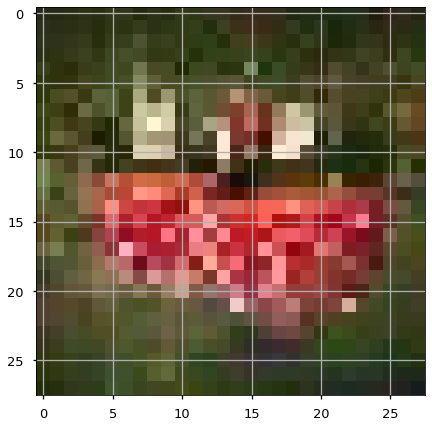

In [12]:
plot_mushroom_image(939,train_images,train_labels)

### Creating a dictionary with the labels and numbers for each label

In [13]:
l1 = list(range(48))
l2 = list(np.unique(labels))
d = dict(zip(l1,l2))
#create a dictionary to use one hot encoder

Transform to one hot encoder the 48 classes 

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

ohetrain = OneHotEncoder(sparse = False)
le = LabelEncoder()
OneHotTrain = ohetrain.fit_transform(le.fit_transform(train_labels).reshape(-1, 1))

ohetest = OneHotEncoder(sparse = False)
le = LabelEncoder()
OneHotTest = ohetest.fit_transform(le.fit_transform(test_labels).reshape(-1, 1))

oheval = OneHotEncoder(sparse = False)
le = LabelEncoder()
OneHotVal = oheval.fit_transform(le.fit_transform(validation_labels).reshape(-1, 1))

# Applying CNN (Convolutional Neural Network)

## Creating our first convolutional neural network



### with stochastic gradient descent

In [15]:
INIT_LR = 1e-3
epochs = 200
batch_size = 32
nClasses = 48

def cnn_model():
  model = Sequential()

  model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,3)))
  model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
  model.add(MaxPool2D(pool_size=(3,3)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
  model.add(MaxPool2D(pool_size=(3,3)))
  model.add(Dropout(0.25))

  
  model.add(Flatten())

  model.add(Dense(200, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(nClasses, activation='softmax'))
  
  model.summary()

  return model
  
  

In [16]:
model = cnn_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        12832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 32)          0

In [ ]:
## we choose the Adam optimizer

model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(),metrics=['categorical_accuracy'])

In [17]:
#### probamos con sgd

model.compile(optimizer=optimizers.SGD(lr=0.01),loss=losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])

In [18]:
h = model.fit(train_images,OneHotTrain, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validation_images,OneHotVal))


Epoch 1/200
197/197 [==============================] - 4s 7ms/step - loss: 3.8752 - categorical_accuracy: 0.0226 - val_loss: 3.8718 - val_categorical_accuracy: 0.0209
Epoch 2/200
197/197 [==============================] - 1s 4ms/step - loss: 3.8695 - categorical_accuracy: 0.0239 - val_loss: 3.8696 - val_categorical_accuracy: 0.0164
Epoch 3/200
197/197 [==============================] - 1s 4ms/step - loss: 3.8682 - categorical_accuracy: 0.0280 - val_loss: 3.8672 - val_categorical_accuracy: 0.0164
Epoch 4/200
197/197 [==============================] - 1s 4ms/step - loss: 3.8658 - categorical_accuracy: 0.0252 - val_loss: 3.8631 - val_categorical_accuracy: 0.0194
Epoch 5/200
197/197 [==============================] - 1s 4ms/step - loss: 3.8631 - categorical_accuracy: 0.0290 - val_loss: 3.8597 - val_categorical_accuracy: 0.0209
Epoch 6/200
197/197 [==============================] - 1s 4ms/step - loss: 3.8576 - categorical_accuracy: 0.0292 - val_loss: 3.8508 - val_categorical_accuracy: 0.025

### Evaluating the model

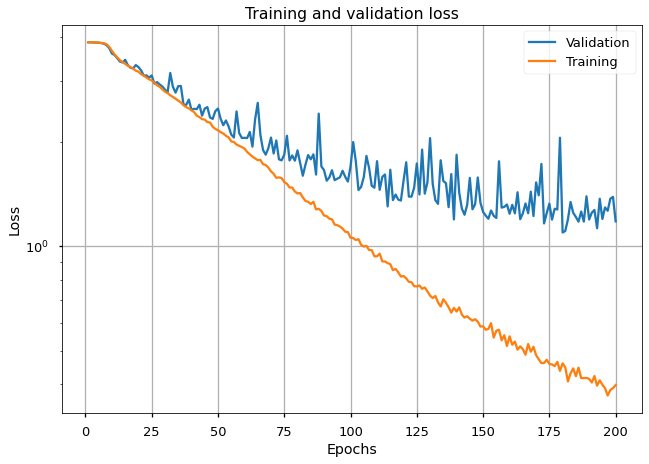

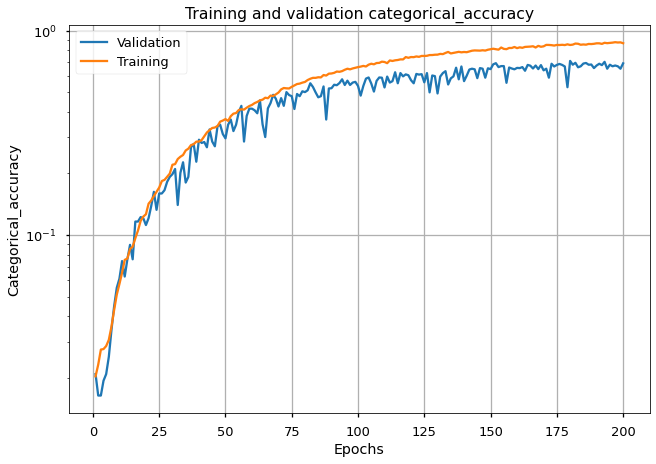

In [19]:
plot_metric(h,'loss')
plot_metric(h,'categorical_accuracy')

Amanita curtipes


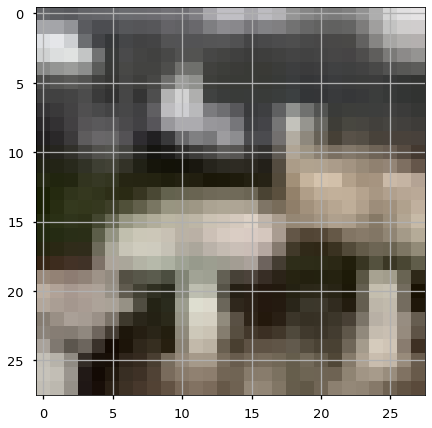

In [20]:
plot_mushroom_image(100,test_images,test_labels)

In [21]:
model.evaluate(test_images,OneHotTest)

23/23 [==============================] - 0s 5ms/step - loss: 1.1702 - categorical_accuracy: 0.7171


[1.170159935951233, 0.7170596122741699]

In [46]:
## save my model 

model.save("model_mushrooms_SGD.h5")

In [48]:
from keras.models import load_model

model = load_model('model_mushrooms_SGD.h5')

### Doing predictions

In [26]:
y_pred = model.predict_proba(test_images)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [27]:
df = pd.DataFrame(y_pred[100], columns = ['probabilities'])

In [28]:
df['labels']=l2

In [59]:
## save to use after in the app

pd.Series(l2).to_csv('mushrooms_labels.csv',sep='|')

In [63]:
l3 = pd.read_csv('mushrooms_labels.csv',sep='|')

In [70]:
l3['0'].to_list()

['Agaricus arvensis',
 'Agaricus bitorquis',
 'Agaricus campestris',
 'Agaricus sylvaticus',
 'Amanita caesarea',
 'Amanita citrina',
 'Amanita curtipes',
 'Amanita muscaria',
 'Amanita pantherina',
 'Amanita phalloides',
 'Boletus aereus',
 'Boletus aestivalis',
 'Boletus edulis',
 'Boletus erythropus',
 'Boletus luridus',
 'Boletus pinophilus',
 'Boletus satanas',
 'Cantharellus cibarius',
 'Clitocybe gibba',
 'Clitocybe odora',
 'Cratarellus cornucopioide',
 'Cratarellus lutescens',
 'Ganoderma lucidum',
 'Lactarius controversus',
 'Lactarius deliciosus',
 'Lactarius rufus',
 'Lactarius sanguifluus',
 'Lepista nuda',
 'Macrolepiota mastoidea',
 'Macrolepiota procera',
 'Marasmius oreades',
 'Morchella elata',
 'Morchella esculenta',
 'Morchella vulgaris',
 'Pleurotus eryngii',
 'Pleurotus ostreatus',
 'Russula chloroides',
 'Russula cyanoxantha',
 'Russula vesca',
 'Sparasis crispa',
 'Suillus luteus',
 'Terfecia leptoderma',
 'Tricholoma columbetta',
 'Tricholoma equestre',
 'Trich

In [66]:
l3.drop('Unnamed: 0')

KeyError: ignored

In [29]:
df_sort = df.sort_values('probabilities',ascending = False)[0:3]

In [126]:
df_sort=df_sort.reset_index(drop=True)

In [128]:
df_sort['probabilities'][0]

0.7198548

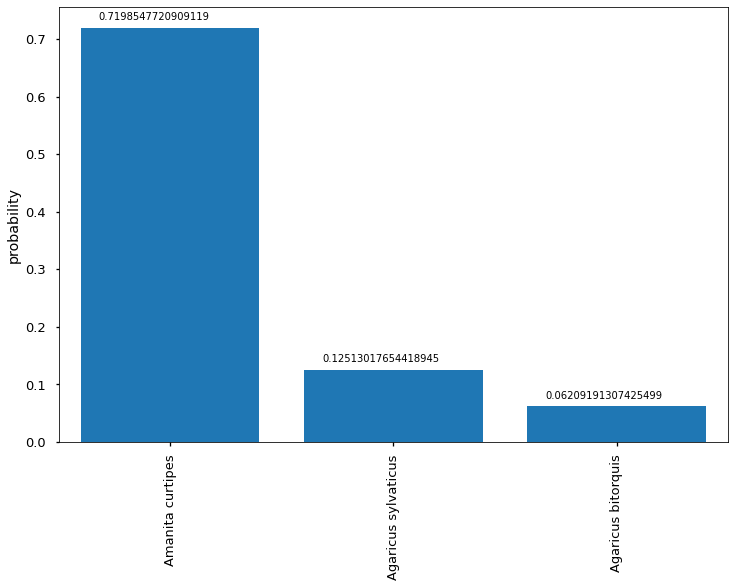

In [129]:
X=df_sort['probabilities']
Y=df_sort['labels']

plt.figure(figsize=(12, 8))

plt.bar(range(len(X)), X)
plt.xticks(np.arange(len(X)), Y)
plt.ylabel('probability')
ax = X.plot(kind='bar')
ax.set_xticklabels(Y)
rects = ax.patches

for rect, label in zip(rects, X):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 10, height+0.01, label,
            ha='left', va='bottom')
    
plt.show()

# Streamlit

## Installing Ngrok for Streamlit

In [32]:
from google.colab import files
uploaded = files.upload()

Saving ngrok-stable-linux-amd64.zip to ngrok-stable-linux-amd64.zip


In [33]:
!unzip /content/ngrok-stable-linux-amd64.zip

Archive:  /content/ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [34]:
!ngrok authtoken 1s4dWx40WEPgxZOREhcu4JZc5JL_79bCSDk2c3hVJ38GTc2zz

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [35]:
public_url = ngrok.connect(port = '80')

2021-05-08 11:33:24.829 INFO    pyngrok.ngrok: Opening tunnel named: http-80-eb95c759-33fb-4909-8653-951b19911528
2021-05-08 11:33:24.901 INFO    pyngrok.process.ngrok: t=2021-05-08T11:33:24+0000 lvl=info msg="no configuration paths supplied"
2021-05-08 11:33:24.903 INFO    pyngrok.process.ngrok: t=2021-05-08T11:33:24+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2021-05-08 11:33:24.908 INFO    pyngrok.process.ngrok: t=2021-05-08T11:33:24+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2021-05-08 11:33:24.914 INFO    pyngrok.process.ngrok: t=2021-05-08T11:33:24+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2021-05-08 11:33:24.987 INFO    pyngrok.process.ngrok: t=2021-05-08T11:33:24+0000 lvl=info msg="tunnel session started" obj=tunnels.session
2021-05-08 11:33:24.991 INFO    pyngrok.process.ngrok: t=2021-05-08T11:33:24+0000 lvl=info msg="client session established" obj=csess id=7d84cadcb0f1
2

In [36]:
public_url

<NgrokTunnel: "http://2d1be9e21322.ngrok.io" -> "http://localhost:80">

In [161]:
%%writefile app.py

import streamlit as st
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
#working with images
from matplotlib import image
from matplotlib import pyplot
from skimage import io
import cv2
import os
import skimage
from skimage import data, io, filters, transform
import numpy as np

##load model
from keras.models import load_model

#import deep learning libraries
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Input
import tensorflow as tf

st.title('Mushrooms Classification')
st.subheader('App to know what mushroom is your picture')

st.markdown("Hello everybody and welcome to this interactive website on mushrooms classification.")
st.markdown("This work consists on classifying different types of mushrooms from images, using the famous convolutional neural networks (CNN) as a method.")
st.markdown("Put a mushroom and get the probability that it is a type of mushroom among the different species studied, and you will also get the 3 most likely mushrooms it is.")
st.markdown("Please, put a picture of your choice")

#load the model saved before.

model = load_model('model_mushrooms_SGD.h5')

## read the msuhrooms labels csv

l2 = pd.read_csv('mushrooms_labels.csv',sep='|')
l2 = l2['0'].to_list()
try:
  picture = st.file_uploader('picture',type='jpg')
  st.image(picture)
  image_rgb=io.imread(picture)/255.0
  data_picture = cv2.resize(image_rgb, (28, 28))
  pictures = np.array([data_picture])
  pred_photos = model.predict_proba(pictures)
  df = pd.DataFrame(pred_photos[0], columns = ['probabilities'])
  df['labels']=l2
  df_sort = df.sort_values('probabilities',ascending = False)[0:3]
  #fig = plt.bar(df_sort['labels'],df_sort['probabilities'])
  X=df_sort['probabilities']
  Y=df_sort['labels'] 

  fig = plt.figure(figsize=(12, 8))

  plt.bar(range(len(X)), X)
  plt.xticks(np.arange(len(X)), Y)
  plt.ylabel('probability')
  ax = X.plot(kind='bar')
  ax.set_xticklabels(Y)
  rects = ax.patches

  for rect, label in zip(rects, X):
      height = rect.get_height()
      ax.text(rect.get_x() + rect.get_width() / 10, height+0.01, label,
              ha='left', va='bottom')

  st.pyplot(fig)

  Y[:-2][::]

except:
  pass



Overwriting app.py


In [38]:
!streamlit run --server.port 80 app.py&>/dev/null&

In [ ]:
#### vamos a comprobar con una imagen aletaria que cojo de google.

import numpy as np
from google.colab import files

uploaded=files.upload()



Saving Amanita_phalloides.jpg to Amanita_phalloides.jpg


In [ ]:
#route ='/content/istockphoto-1015452220-612x612.jpg'
#route1 = '/content/images.jpeg'
#route2 = '/content/images.jpeg'
#route3 = '/content/maxresdefault.jpg'
route4 = '/content/Amanita_phalloides.jpg'
#route5 = '/content/unnamed.jpg'
#image_rgb=io.imread(route)/255.0
#image_rgb1=io.imread(route1)/255.0
#image_rgb2=io.imread(route2)/255.0
#image_rgb3=io.imread(route3)/255.0
image_rgb4=io.imread(route4)/255.0
#image_rgb5=io.imread(route5)/255.0

In [ ]:
#data_picture = cv2.resize(image_rgb, (28, 28))
#data_picture1 = cv2.resize(image_rgb1, (28, 28))
#data_picture2 = cv2.resize(image_rgb2, (28, 28))
#data_picture3 = cv2.resize(image_rgb3, (28, 28))
data_picture4 = cv2.resize(image_rgb4, (28, 28))
#data_picture5 = cv2.resize(image_rgb5, (28, 28))

In [ ]:
pictures = np.array([data_picture4])

In [ ]:
# predecimos la clase

pred_photos = model.predict_proba(pictures)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


,probabilities,labels
19,0.999995,Clitocybe odora
36,0.000003,Russula chloroides
9,0.000001,Amanita phalloides


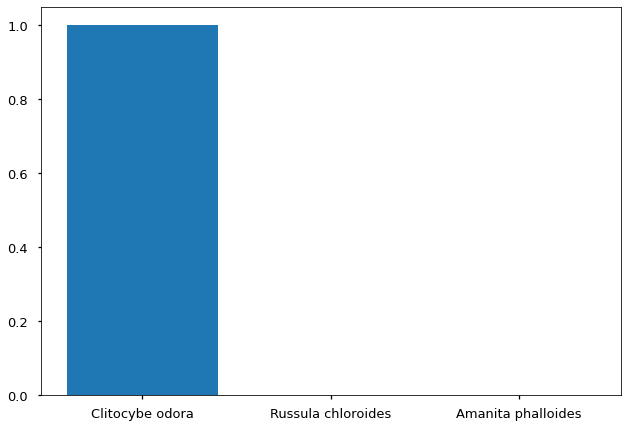

In [ ]:
df = pd.DataFrame(pred_photos[0], columns = ['probabilities'])
df['labels']=l2
df_sort = df.sort_values('probabilities',ascending = False)[0:3]
plt.bar(df_sort['labels'],df_sort['probabilities'])
df_sort

### Evaluating the test data

In [ ]:
target_names

In [ ]:
predictions

In [ ]:
from sklearn.metrics import confusion_matrix


cm=confusion_matrix(test_labels, predictions, labels=target_names)

In [ ]:
sns.heatmap(cm,annot=True,cmap="YlGnBu")